In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import time
import datetime
import copy

import xobjects as xo

from config import lhc_configs, particle_config_low, particle_config_mid, particle_config_high, run_config_quickest, run_config_quickest_no_chk, run_config_test, run_config_test_no_chk, run_config_test_no_norm, run_config_test_no_chk_no_norm, run_config_dyn_indicator, run_config_ground_truth

import definitive_dyn_indicators.utils.xtrack_engine as xe

ImportError: cannot import name 'run_config_test_no_chk_no_norm' from 'config' (/gpfs/gpfs/gpfs_maestro_home_new/hpc/camontan/definitive_dyn_indicators/jobs/IPAC_LHC/config.py)

In [ ]:
context = xo.ContextCupy()

particle_config = particle_config_low[0]
particle_config.samples = 100
lhc_config = lhc_configs[0]

run_config = run_config_test
run_config_nochk = run_config_test_no_chk
run_config_nonorm = run_config_test_no_norm
run_config_nono = run_config_test_no_chk_no_norm


NameError: name 'run_config_test_no_norm' is not defined

In [ ]:
coso = xe.RunConfig(
    times = np.arange(100, 100100, 100),
    t_norm = 100,
    displacement_module = 1e-12,
    t_checkpoints = 100
)

In [ ]:
intial_conditions = particle_config.get_initial_conditions()
displacement = particle_config.get_initial_conditions_with_displacement(
    run_config.displacement_module, "random")
displacement_x = particle_config.get_initial_conditions_with_displacement(
    run_config.displacement_module, "x")
displacement_px = particle_config.get_initial_conditions_with_displacement(
    run_config.displacement_module, "px")
displacement_y = particle_config.get_initial_conditions_with_displacement(
    run_config.displacement_module, "y")
displacement_py = particle_config.get_initial_conditions_with_displacement(
    run_config.displacement_module, "py")
displacement_zeta = particle_config.get_initial_conditions_with_displacement(
    run_config.displacement_module, "z")
displacement_delta = particle_config.get_initial_conditions_with_displacement(
    run_config.displacement_module, "delta")


In [ ]:
particles = intial_conditions.create_particles(context=context)
particles_d = displacement_x.create_particles(context=context)

In [ ]:
chk = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config,

    particles_list = [
        particles.to_dict(),
        particles_d.to_dict(),
    ]
)

chk_nochk = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config_nochk,

    particles_list = [
        particles.to_dict(),
        particles_d.to_dict(),
    ]
)

chk_nonorm = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config_nonorm,

    particles_list = [
        particles.to_dict(),
        particles_d.to_dict(),
    ]
)

chk_nono = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config_nono,

    particles_list = [
        particles.to_dict(),
        particles_d.to_dict(),
    ]
)

In [ ]:
output = "lyapunov.hdf5"
output_nochk = "lyapunov_nochk.hdf5"
output_nonorm = "lyapunov_nonorm.hdf5"
output_nono = "lyapunov_nono.hdf5"

In [ ]:
# if output exists, remove it
if os.path.exists(output):
    os.remove(output)

if os.path.exists(output_nochk):
    os.remove(output_nochk)

if os.path.exists(output_nonorm):
    os.remove(output_nonorm)

if os.path.exists(output_nono):
    os.remove(output_nono)

In [20]:
while not chk.completed:
    chk = xe.track_lyapunov(chk, output, context)

  0%|          | 0/110 [00:00<?, ?it/s]

Event normalize, at time 10. Current time 0.


  1%|          | 1/110 [00:00<00:49,  2.20it/s]

Event normalize, at time 20. Current time 10.


  2%|▏         | 2/110 [00:00<00:48,  2.25it/s]

Event normalize, at time 30. Current time 20.


  3%|▎         | 3/110 [00:01<00:47,  2.26it/s]

Event normalize, at time 40. Current time 30.


  4%|▎         | 4/110 [00:01<00:46,  2.27it/s]

Event normalize, at time 50. Current time 40.


  5%|▍         | 5/110 [00:02<00:46,  2.28it/s]

Event normalize, at time 60. Current time 50.


  5%|▌         | 6/110 [00:02<00:45,  2.28it/s]

Event normalize, at time 70. Current time 60.


  6%|▋         | 7/110 [00:03<00:45,  2.28it/s]

Event normalize, at time 80. Current time 70.


  7%|▋         | 8/110 [00:03<00:44,  2.28it/s]

Event normalize, at time 90. Current time 80.


  8%|▊         | 9/110 [00:03<00:44,  2.28it/s]

Event sample, at time 100. Current time 90.


  9%|▉         | 10/110 [00:04<00:43,  2.29it/s]

Event normalize, at time 100. Current time 100.
Event normalize, at time 110. Current time 100.


 11%|█         | 12/110 [00:04<00:33,  2.96it/s]

Event normalize, at time 120. Current time 110.


 12%|█▏        | 13/110 [00:05<00:35,  2.76it/s]

Event normalize, at time 130. Current time 120.


 13%|█▎        | 14/110 [00:05<00:36,  2.62it/s]

Event normalize, at time 140. Current time 130.


 14%|█▎        | 15/110 [00:06<00:37,  2.51it/s]

Event normalize, at time 150. Current time 140.


 15%|█▍        | 16/110 [00:06<00:38,  2.45it/s]

Event normalize, at time 160. Current time 150.


 15%|█▌        | 17/110 [00:07<00:38,  2.40it/s]

Event normalize, at time 170. Current time 160.


 16%|█▋        | 18/110 [00:07<00:38,  2.36it/s]

Event normalize, at time 180. Current time 170.


 17%|█▋        | 19/110 [00:07<00:38,  2.34it/s]

Event normalize, at time 190. Current time 180.


 18%|█▊        | 20/110 [00:08<00:38,  2.32it/s]

Event sample, at time 200. Current time 190.


 19%|█▉        | 21/110 [00:08<00:38,  2.32it/s]

Event normalize, at time 200. Current time 200.
Event normalize, at time 210. Current time 200.


 21%|██        | 23/110 [00:09<00:29,  2.98it/s]

Event normalize, at time 220. Current time 210.


 22%|██▏       | 24/110 [00:09<00:31,  2.77it/s]

Event normalize, at time 230. Current time 220.


 23%|██▎       | 25/110 [00:10<00:32,  2.62it/s]

Event normalize, at time 240. Current time 230.


 24%|██▎       | 26/110 [00:10<00:33,  2.52it/s]

Event normalize, at time 250. Current time 240.


 25%|██▍       | 27/110 [00:10<00:33,  2.45it/s]

Event normalize, at time 260. Current time 250.


 25%|██▌       | 28/110 [00:11<00:34,  2.40it/s]

Event normalize, at time 270. Current time 260.


 26%|██▋       | 29/110 [00:11<00:34,  2.37it/s]

Event normalize, at time 280. Current time 270.


 27%|██▋       | 30/110 [00:12<00:34,  2.34it/s]

Event normalize, at time 290. Current time 280.


 28%|██▊       | 31/110 [00:12<00:33,  2.33it/s]

Event sample, at time 300. Current time 290.


 29%|██▉       | 32/110 [00:13<00:33,  2.32it/s]

Event normalize, at time 300. Current time 300.
Event normalize, at time 310. Current time 300.


 31%|███       | 34/110 [00:13<00:25,  2.98it/s]

Event normalize, at time 320. Current time 310.


 32%|███▏      | 35/110 [00:14<00:27,  2.77it/s]

Event normalize, at time 330. Current time 320.


 33%|███▎      | 36/110 [00:14<00:28,  2.63it/s]

Event normalize, at time 340. Current time 330.


 34%|███▎      | 37/110 [00:14<00:28,  2.52it/s]

Event normalize, at time 350. Current time 340.


 35%|███▍      | 38/110 [00:15<00:29,  2.45it/s]

Event normalize, at time 360. Current time 350.


 35%|███▌      | 39/110 [00:15<00:29,  2.40it/s]

Event normalize, at time 370. Current time 360.


 36%|███▋      | 40/110 [00:16<00:29,  2.37it/s]

Event normalize, at time 380. Current time 370.


 37%|███▋      | 41/110 [00:16<00:29,  2.34it/s]

Event normalize, at time 390. Current time 380.


 38%|███▊      | 42/110 [00:17<00:29,  2.33it/s]

Event sample, at time 400. Current time 390.


 39%|███▉      | 43/110 [00:17<00:28,  2.32it/s]

Event normalize, at time 400. Current time 400.
Event normalize, at time 410. Current time 400.


 41%|████      | 45/110 [00:17<00:21,  2.98it/s]

Event normalize, at time 420. Current time 410.


 42%|████▏     | 46/110 [00:18<00:23,  2.77it/s]

Event normalize, at time 430. Current time 420.


 43%|████▎     | 47/110 [00:18<00:23,  2.63it/s]

Event normalize, at time 440. Current time 430.


 44%|████▎     | 48/110 [00:19<00:24,  2.52it/s]

Event normalize, at time 450. Current time 440.


 45%|████▍     | 49/110 [00:19<00:24,  2.45it/s]

Event normalize, at time 460. Current time 450.


 45%|████▌     | 50/110 [00:20<00:24,  2.40it/s]

Event normalize, at time 470. Current time 460.


 46%|████▋     | 51/110 [00:20<00:24,  2.37it/s]

Event normalize, at time 480. Current time 470.


 47%|████▋     | 52/110 [00:21<00:24,  2.34it/s]

Event normalize, at time 490. Current time 480.


 48%|████▊     | 53/110 [00:21<00:24,  2.33it/s]

Event sample, at time 500. Current time 490.


 50%|█████     | 55/110 [00:21<00:21,  2.51it/s]


Event normalize, at time 500. Current time 500.
Event checkpoint, at time 500. Current time 500.


  0%|          | 0/110 [00:00<?, ?it/s]

Event normalize, at time 10. Current time 500.
Event normalize, at time 20. Current time 500.
Event normalize, at time 30. Current time 500.
Event normalize, at time 40. Current time 500.
Event normalize, at time 50. Current time 500.
Event normalize, at time 60. Current time 500.
Event normalize, at time 70. Current time 500.
Event normalize, at time 80. Current time 500.
Event normalize, at time 90. Current time 500.
Event sample, at time 100. Current time 500.
Event normalize, at time 100. Current time 500.
Event normalize, at time 110. Current time 500.
Event normalize, at time 120. Current time 500.
Event normalize, at time 130. Current time 500.
Event normalize, at time 140. Current time 500.
Event normalize, at time 150. Current time 500.
Event normalize, at time 160. Current time 500.
Event normalize, at time 170. Current time 500.
Event normalize, at time 180. Current time 500.
Event normalize, at time 190. Current time 500.
Event sample, at time 200. Current time 500.
Event n

 52%|█████▏    | 57/110 [00:00<00:00, 118.17it/s]

Event normalize, at time 520. Current time 510.
Event normalize, at time 530. Current time 520.
Event normalize, at time 540. Current time 530.
Event normalize, at time 550. Current time 540.
Event normalize, at time 560. Current time 550.
Event normalize, at time 570. Current time 560.
Event normalize, at time 580. Current time 570.
Event normalize, at time 590. Current time 580.
Event sample, at time 600. Current time 590.
Event normalize, at time 600. Current time 600.
Event normalize, at time 610. Current time 600.
Event normalize, at time 620. Current time 610.


 63%|██████▎   | 69/110 [00:05<00:04,  9.65it/s] 

Event normalize, at time 630. Current time 620.
Event normalize, at time 640. Current time 630.
Event normalize, at time 650. Current time 640.
Event normalize, at time 660. Current time 650.
Event normalize, at time 670. Current time 660.
Event normalize, at time 680. Current time 670.


 68%|██████▊   | 75/110 [00:08<00:05,  6.51it/s]

Event normalize, at time 690. Current time 680.
Event sample, at time 700. Current time 690.


 71%|███████   | 78/110 [00:09<00:05,  5.96it/s]

Event normalize, at time 700. Current time 700.
Event normalize, at time 710. Current time 700.
Event normalize, at time 720. Current time 710.


 73%|███████▎  | 80/110 [00:10<00:05,  5.23it/s]

Event normalize, at time 730. Current time 720.
Event normalize, at time 740. Current time 730.


 75%|███████▍  | 82/110 [00:11<00:06,  4.57it/s]

Event normalize, at time 750. Current time 740.


 75%|███████▌  | 83/110 [00:11<00:06,  4.25it/s]

Event normalize, at time 760. Current time 750.


 76%|███████▋  | 84/110 [00:11<00:06,  3.92it/s]

Event normalize, at time 770. Current time 760.


 77%|███████▋  | 85/110 [00:12<00:06,  3.60it/s]

Event normalize, at time 780. Current time 770.


 78%|███████▊  | 86/110 [00:12<00:07,  3.30it/s]

Event normalize, at time 790. Current time 780.


 79%|███████▉  | 87/110 [00:13<00:07,  3.04it/s]

Event sample, at time 800. Current time 790.


 80%|████████  | 88/110 [00:13<00:07,  2.83it/s]

Event normalize, at time 800. Current time 800.
Event normalize, at time 810. Current time 800.


 82%|████████▏ | 90/110 [00:14<00:06,  3.22it/s]

Event normalize, at time 820. Current time 810.


 83%|████████▎ | 91/110 [00:14<00:06,  2.94it/s]

Event normalize, at time 830. Current time 820.


 84%|████████▎ | 92/110 [00:15<00:06,  2.73it/s]

Event normalize, at time 840. Current time 830.


 85%|████████▍ | 93/110 [00:15<00:06,  2.57it/s]

Event normalize, at time 850. Current time 840.


 85%|████████▌ | 94/110 [00:16<00:06,  2.46it/s]

Event normalize, at time 860. Current time 850.


 86%|████████▋ | 95/110 [00:16<00:06,  2.38it/s]

Event normalize, at time 870. Current time 860.


 87%|████████▋ | 96/110 [00:16<00:06,  2.32it/s]

Event normalize, at time 880. Current time 870.


 88%|████████▊ | 97/110 [00:17<00:05,  2.28it/s]

Event normalize, at time 890. Current time 880.


 89%|████████▉ | 98/110 [00:17<00:05,  2.25it/s]

Event sample, at time 900. Current time 890.


 90%|█████████ | 99/110 [00:18<00:04,  2.24it/s]

Event normalize, at time 900. Current time 900.
Event normalize, at time 910. Current time 900.


 92%|█████████▏| 101/110 [00:18<00:03,  2.85it/s]

Event normalize, at time 920. Current time 910.


 93%|█████████▎| 102/110 [00:19<00:03,  2.65it/s]

Event normalize, at time 930. Current time 920.


 94%|█████████▎| 103/110 [00:19<00:02,  2.51it/s]

Event normalize, at time 940. Current time 930.


 95%|█████████▍| 104/110 [00:20<00:02,  2.41it/s]

Event normalize, at time 950. Current time 940.


 95%|█████████▌| 105/110 [00:20<00:02,  2.34it/s]

Event normalize, at time 960. Current time 950.


 96%|█████████▋| 106/110 [00:21<00:01,  2.30it/s]

Event normalize, at time 970. Current time 960.


 97%|█████████▋| 107/110 [00:21<00:01,  2.26it/s]

Event normalize, at time 980. Current time 970.


 98%|█████████▊| 108/110 [00:22<00:00,  2.24it/s]

Event normalize, at time 990. Current time 980.


 99%|█████████▉| 109/110 [00:22<00:00,  2.22it/s]

Event sample, at time 1000. Current time 990.


100%|██████████| 110/110 [00:22<00:00,  4.79it/s]


In [21]:
while not chk_nochk.completed:
    chk_nochk = xe.track_lyapunov(chk_nochk, output_nochk, context)

  0%|          | 0/10 [00:00<?, ?it/s]

Event sample, at time 100. Current time 0.


 10%|█         | 1/10 [00:04<00:38,  4.31s/it]

Event sample, at time 200. Current time 100.


 20%|██        | 2/10 [00:08<00:34,  4.29s/it]

Event sample, at time 300. Current time 200.


 30%|███       | 3/10 [00:12<00:29,  4.28s/it]

Event sample, at time 400. Current time 300.


 40%|████      | 4/10 [00:17<00:25,  4.28s/it]

Event sample, at time 500. Current time 400.


 50%|█████     | 5/10 [00:21<00:21,  4.28s/it]

Event sample, at time 600. Current time 500.


 60%|██████    | 6/10 [00:25<00:17,  4.28s/it]

Event sample, at time 700. Current time 600.


 70%|███████   | 7/10 [00:29<00:12,  4.28s/it]

Event sample, at time 800. Current time 700.


 80%|████████  | 8/10 [00:34<00:08,  4.27s/it]

Event sample, at time 900. Current time 800.


 90%|█████████ | 9/10 [00:38<00:04,  4.27s/it]

Event sample, at time 1000. Current time 900.


100%|██████████| 10/10 [00:42<00:00,  4.28s/it]


In [22]:
with h5py.File(output, "r") as file:
    d0 = file[f"lyapunov/{1000}"][:]

with h5py.File(output_nochk, "r") as file:
    d1 = file[f"lyapunov/{1000}"][:]

In [23]:
d0

array([0.28406813, 0.27199251, 0.29937875, ...,        nan,        nan,
              nan])

In [24]:
d1

array([0.00372974, 0.00273534, 0.00388931, ...,        nan,        nan,
              nan])

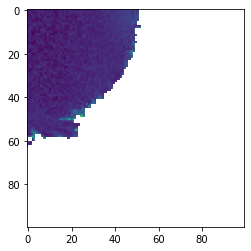

In [28]:
plt.imshow(d0.reshape(100, 100))

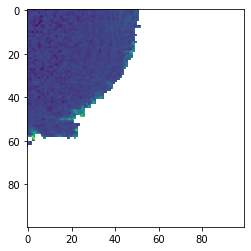

In [27]:
plt.imshow(d1.reshape(100, 100))

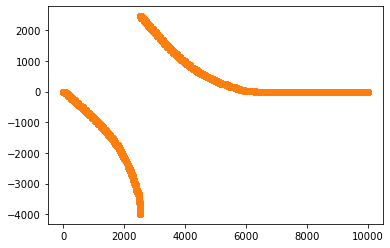

In [30]:
for p in chk.particles_list:
    plt.scatter(np.arange(len(p["particle_id"])), np.arange(len(p["particle_id"]))-p["particle_id"])

In [34]:
import xpart as xp
test_particles = xp.Particles.from_dict(chk.particles_list[0])
test_particles_2 = xp.Particles.from_dict(chk.particles_list[0])

In [35]:
test_particles_2.x += np.linspace(0, 1, len(test_particles_2.x))

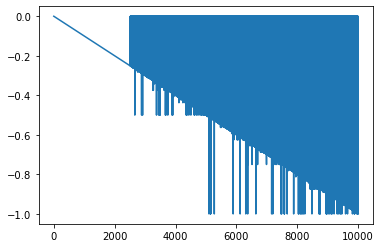

In [36]:
plt.plot(np.arange(len(test_particles.x)), test_particles.x - test_particles_2.x)

In [15]:
particles = intial_conditions.create_particles(context=context)
particles_x = displacement_x.create_particles(context=context)
particles_px = displacement_px.create_particles(context=context)
particles_y = displacement_y.create_particles(context=context)
particles_py = displacement_py.create_particles(context=context)
particles_z = displacement_zeta.create_particles(context=context)
particles_d = displacement_delta.create_particles(context=context)


In [16]:
chk = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config,

    particles_list = [
        particles.to_dict(),
        particles_x.to_dict(),
        particles_px.to_dict(),
        particles_y.to_dict(),
        particles_py.to_dict(),
        particles_z.to_dict(),
        particles_d.to_dict()
    ]
)

chk_nochk = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config_nochk,

    particles_list=[
        particles.to_dict(),
        particles_x.to_dict(),
        particles_px.to_dict(),
        particles_y.to_dict(),
        particles_py.to_dict(),
        particles_z.to_dict(),
        particles_d.to_dict()
    ]
)


In [17]:
output = "ofli_lyapunov.hdf5"
output_nochk = "ofli_lyapunov_nochk.hdf5"

In [18]:
# if output exists, remove it
if os.path.exists(output):
    os.remove(output)

if os.path.exists(output_nochk):
    os.remove(output_nochk)

In [19]:
while not chk.completed:
    chk = xe.track_ortho_lyapunov(chk, output, context)

generating ./4a45c536c2554469b46ad76e7668a802.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building '4a45c536c2554469b46ad76e7668a802' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 4a45c536c2554469b46ad76e7668a802.c -o ./4a45c536c2554469b46ad76e7668a802.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./4a45c536c2554469b46ad76e7668a802.o -o ./4a45c536c2554469b46ad76e7668a802.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


 50%|█████     | 2/4 [00:02<00:02,  1.45s/it]


generating ./d7711d08b45449eea7a3896e9cd738ae.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building 'd7711d08b45449eea7a3896e9cd738ae' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c d7711d08b45449eea7a3896e9cd738ae.c -o ./d7711d08b45449eea7a3896e9cd738ae.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./d7711d08b45449eea7a3896e9cd738ae.o -o ./d7711d08b45449eea7a3896e9cd738ae.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


100%|██████████| 4/4 [00:02<00:00,  1.66it/s]


In [20]:
while not chk_nochk.completed:
    chk_nochk = xe.track_ortho_lyapunov(chk_nochk, output_nochk, context)


generating ./f4a6258dc5274748abb283bc8e086beb.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building 'f4a6258dc5274748abb283bc8e086beb' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c f4a6258dc5274748abb283bc8e086beb.c -o ./f4a6258dc5274748abb283bc8e086beb.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./f4a6258dc5274748abb283bc8e086beb.o -o ./f4a6258dc5274748abb283bc8e086beb.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


100%|██████████| 3/3 [00:05<00:00,  1.67s/it]


In [21]:
with h5py.File(output, "r") as file:
    d0 = file[f"lyapunov/{20}"][:]

with h5py.File(output_nochk, "r") as file:
    d1 = file[f"lyapunov/{20}"][:]


In [22]:
d0

array([[ 0.12657575,  0.08668738,  0.08534254,  0.06865556, -0.0047325 ,
         0.39892632,         nan,         nan,         nan,         nan,
         0.08561305,  0.0866918 ,  0.08714773,  0.11941399,  0.07558157,
         0.23224121,         nan,         nan,         nan,         nan,
         0.08480291,  0.21299905,  0.08478922,  0.09261236,  0.13590643,
                nan,         nan,         nan,         nan,         nan,
         0.16132914,  0.08008226,  0.07731466,  0.12920488,  0.20854882,
                nan,         nan,         nan,         nan,         nan,
         0.12792045,  0.12297476,  0.04546679,  0.0622045 ,  0.30090453,
                nan,         nan,         nan,         nan,         nan,
         0.07881321,  0.08541754,  0.04506236,  0.02365202,  0.21653126,
                nan,         nan,         nan,         nan,         nan,
         0.24374883,  0.34166668,  0.25724447,  0.52310204,         nan,
                nan,         nan,         nan,     

In [23]:
d1

array([[ 0.12657575,  0.08668738,  0.08534254,  0.06865556, -0.0047325 ,
         0.39892632,         nan,         nan,         nan,         nan,
         0.08561305,  0.0866918 ,  0.08714773,  0.11941399,  0.07558157,
         0.23224121,         nan,         nan,         nan,         nan,
         0.08480291,  0.21299905,  0.08478922,  0.09261236,  0.13590643,
                nan,         nan,         nan,         nan,         nan,
         0.16132914,  0.08008226,  0.07731466,  0.12920488,  0.20854882,
                nan,         nan,         nan,         nan,         nan,
         0.12792045,  0.12297476,  0.04546679,  0.0622045 ,  0.30090453,
                nan,         nan,         nan,         nan,         nan,
         0.07881321,  0.08541754,  0.04506236,  0.02365202,  0.21653126,
                nan,         nan,         nan,         nan,         nan,
         0.24374883,  0.34166668,  0.25724447,  0.52310204,         nan,
                nan,         nan,         nan,     

In [24]:
particles = intial_conditions.create_particles(context=context)


In [25]:
chk = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config,

    particles_list = [
        particles.to_dict()
    ]
)

chk_nochk = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config_nochk,

    particles_list=[
        particles.to_dict()
    ]
)


In [26]:
output = "rem.hdf5"
output_nochk = "rem_nochk.hdf5"

In [27]:
# if output exists, remove it
if os.path.exists(output):
    os.remove(output)

if os.path.exists(output_nochk):
    os.remove(output_nochk)

In [28]:
while not chk.completed:
    chk = xe.track_reverse(chk, output, context)

generating ./16f47b9cf3b840ae8bc50eeeb4a8d6ec.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building '16f47b9cf3b840ae8bc50eeeb4a8d6ec' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 16f47b9cf3b840ae8bc50eeeb4a8d6ec.c -o ./16f47b9cf3b840ae8bc50eeeb4a8d6ec.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./16f47b9cf3b840ae8bc50eeeb4a8d6ec.o -o ./16f47b9cf3b840ae8bc50eeeb4a8d6ec.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


 33%|███▎      | 1/3 [00:00<00:01,  1.35it/s]


generating ./34908fe6e6bc4d20913ce4eb8d067c96.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building '34908fe6e6bc4d20913ce4eb8d067c96' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 34908fe6e6bc4d20913ce4eb8d067c96.c -o ./34908fe6e6bc4d20913ce4eb8d067c96.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./34908fe6e6bc4d20913ce4eb8d067c96.o -o ./34908fe6e6bc4d20913ce4eb8d067c96.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


100%|██████████| 3/3 [00:01<00:00,  2.84it/s]


In [29]:
while not chk_nochk.completed:
    chk_nochk = xe.track_reverse(chk_nochk, output_nochk, context)


generating ./be9ddd3490e04ea8ae8f65f351817f02.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building 'be9ddd3490e04ea8ae8f65f351817f02' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c be9ddd3490e04ea8ae8f65f351817f02.c -o ./be9ddd3490e04ea8ae8f65f351817f02.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./be9ddd3490e04ea8ae8f65f351817f02.o -o ./be9ddd3490e04ea8ae8f65f351817f02.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


In [30]:
with h5py.File(output, "r") as file:
    d0 = file[f"reverse/{20}"][:]

with h5py.File(output_nochk, "r") as file:
    d1 = file[f"reverse/{20}"][:]


In [31]:
d0

array([4.23915857e-15, 3.16970112e-15, 4.01050542e-15, 2.03560210e-15,
       2.21681822e-15, 9.02113025e-15,            nan,            nan,
                  nan,            nan, 4.09946505e-15, 4.07936323e-15,
       5.38914807e-15, 2.61656243e-15, 5.93631919e-15, 3.44922912e-15,
                  nan,            nan,            nan,            nan,
       3.23804170e-15, 1.14203091e-15, 8.11263951e-15, 4.78308818e-15,
       6.77779858e-15,            nan,            nan,            nan,
                  nan,            nan, 4.42550190e-15, 8.95034769e-15,
       9.71309201e-15, 7.33069728e-15, 1.49131771e-14,            nan,
                  nan,            nan,            nan,            nan,
       7.97727719e-15, 6.07757689e-15, 7.41186363e-15, 2.14717231e-15,
       2.46109480e-14,            nan,            nan,            nan,
                  nan,            nan, 7.47367343e-15, 1.09541789e-14,
       4.27417592e-15, 5.89385702e-12, 2.39884206e-14,            nan,
      

In [32]:
d1

array([4.23915857e-15, 3.16970112e-15, 4.01050542e-15, 2.03560210e-15,
       2.21681822e-15, 9.02113025e-15,            nan,            nan,
                  nan,            nan, 4.09946505e-15, 4.07936323e-15,
       5.38914807e-15, 2.61656243e-15, 5.93631919e-15, 3.44922912e-15,
                  nan,            nan,            nan,            nan,
       3.23804170e-15, 1.14203091e-15, 8.11263951e-15, 4.78308818e-15,
       6.77779858e-15,            nan,            nan,            nan,
                  nan,            nan, 4.42550190e-15, 8.95034769e-15,
       9.71309201e-15, 7.33069728e-15, 1.49131771e-14,            nan,
                  nan,            nan,            nan,            nan,
       7.97727719e-15, 6.07757689e-15, 7.41186363e-15, 2.14717231e-15,
       2.46109480e-14,            nan,            nan,            nan,
                  nan,            nan, 7.47367343e-15, 1.09541789e-14,
       4.27417592e-15, 5.89385702e-12, 2.39884206e-14,            nan,
      

In [33]:
particles = intial_conditions.create_particles(context=context)
particles_x = displacement_x.create_particles(context=context)
particles_y = displacement_y.create_particles(context=context)


In [34]:
chk = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config,

    particles_list = [
        particles.to_dict(),
        particles_x.to_dict(),
        particles_y.to_dict(),
    ]
)

chk_nochk = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config_nochk,

    particles_list=[
        particles.to_dict(),
        particles_x.to_dict(),
        particles_y.to_dict(),
    ]
)


In [35]:
output = "sali.hdf5"
output_nochk = "sali_nochk.hdf5"

In [36]:
# if output exists, remove it
if os.path.exists(output):
    os.remove(output)

if os.path.exists(output_nochk):
    os.remove(output_nochk)

In [37]:
while not chk.completed:
    chk = xe.track_sali(chk, output, context)

generating ./4a2c8ceec6664e7ebef5dd75813e20c2.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building '4a2c8ceec6664e7ebef5dd75813e20c2' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 4a2c8ceec6664e7ebef5dd75813e20c2.c -o ./4a2c8ceec6664e7ebef5dd75813e20c2.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./4a2c8ceec6664e7ebef5dd75813e20c2.o -o ./4a2c8ceec6664e7ebef5dd75813e20c2.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


 50%|█████     | 2/4 [00:01<00:01,  1.57it/s]


generating ./55853c42acc04bd0b5ca79de4b630b11.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building '55853c42acc04bd0b5ca79de4b630b11' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 55853c42acc04bd0b5ca79de4b630b11.c -o ./55853c42acc04bd0b5ca79de4b630b11.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./55853c42acc04bd0b5ca79de4b630b11.o -o ./55853c42acc04bd0b5ca79de4b630b11.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


100%|██████████| 4/4 [00:01<00:00,  3.96it/s]


In [38]:
while not chk_nochk.completed:
    chk_nochk = xe.track_sali(chk_nochk, output_nochk, context)


generating ./1c375aab9ebc4c2f8600143bc751c32c.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building '1c375aab9ebc4c2f8600143bc751c32c' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 1c375aab9ebc4c2f8600143bc751c32c.c -o ./1c375aab9ebc4c2f8600143bc751c32c.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./1c375aab9ebc4c2f8600143bc751c32c.o -o ./1c375aab9ebc4c2f8600143bc751c32c.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


In [39]:
with h5py.File(output, "r") as file:
    d0 = file[f"sali/{20}"][:]

with h5py.File(output_nochk, "r") as file:
    d1 = file[f"sali/{20}"][:]


In [40]:
d0

array([0.29331355, 1.39718972, 1.40380148, 1.37555624, 1.32158718,
       0.19277663,        nan,        nan,        nan,        nan,
       1.40049046, 1.36775998, 1.35014068, 0.32068767, 1.08633083,
       1.24557504,        nan,        nan,        nan,        nan,
       1.40638219, 1.39281484, 1.2518883 , 1.15638448, 1.2159181 ,
              nan,        nan,        nan,        nan,        nan,
       0.1344216 , 1.29362541, 1.00230807, 0.24154999, 1.207007  ,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [41]:
d1

array([0.29331355, 1.39718972, 1.40380148, 1.37555624, 1.32158718,
       0.19277663,        nan,        nan,        nan,        nan,
       1.40049046, 1.36775998, 1.35014068, 0.32068767, 1.08633083,
       1.24557504,        nan,        nan,        nan,        nan,
       1.40638219, 1.39281484, 1.2518883 , 1.15638448, 1.2159181 ,
              nan,        nan,        nan,        nan,        nan,
       0.1344216 , 1.29362541, 1.00230807, 0.24154999, 1.207007  ,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [7]:
particles = intial_conditions.create_particles(context=context)
particles_x = displacement_x.create_particles(context=context)
particles_px = displacement_px.create_particles(context=context)
particles_y = displacement_y.create_particles(context=context)
particles_py = displacement_py.create_particles(context=context)


In [8]:
chk = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config,

    particles_list = [
        particles.to_dict(),
        particles_x.to_dict(),
        particles_px.to_dict(),
        particles_y.to_dict(),
        particles_py.to_dict(),
    ]
)

chk_nochk = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config_nochk,

    particles_list=[
        particles.to_dict(),
        particles_x.to_dict(),
        particles_px.to_dict(),
        particles_y.to_dict(),
        particles_py.to_dict(),
    ]
)


In [9]:
output = "gali4.hdf5"
output_nochk = "gali4_nochk.hdf5"

In [10]:
# if output exists, remove it
if os.path.exists(output):
    os.remove(output)

if os.path.exists(output_nochk):
    os.remove(output_nochk)

In [11]:
while not chk.completed:
    chk = xe.track_gali_4(chk, output, context)

generating ./699d77a5926b463f8b6b7b34f1410322.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building '699d77a5926b463f8b6b7b34f1410322' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 699d77a5926b463f8b6b7b34f1410322.c -o ./699d77a5926b463f8b6b7b34f1410322.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./699d77a5926b463f8b6b7b34f1410322.o -o ./699d77a5926b463f8b6b7b34f1410322.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


 50%|█████     | 2/4 [00:02<00:02,  1.05s/it]


generating ./612da4e4fd614f07b6c26f7eba0aea8c.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building '612da4e4fd614f07b6c26f7eba0aea8c' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 612da4e4fd614f07b6c26f7eba0aea8c.c -o ./612da4e4fd614f07b6c26f7eba0aea8c.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./612da4e4fd614f07b6c26f7eba0aea8c.o -o ./612da4e4fd614f07b6c26f7eba0aea8c.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


100%|██████████| 4/4 [00:01<00:00,  2.63it/s]


In [12]:
while not chk_nochk.completed:
    chk_nochk = xe.track_gali_4(chk_nochk, output_nochk, context)


generating ./3f0c88732fa14a7896676206ae4aa950.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building '3f0c88732fa14a7896676206ae4aa950' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 3f0c88732fa14a7896676206ae4aa950.c -o ./3f0c88732fa14a7896676206ae4aa950.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./3f0c88732fa14a7896676206ae4aa950.o -o ./3f0c88732fa14a7896676206ae4aa950.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


100%|██████████| 3/3 [00:03<00:00,  1.19s/it]


In [13]:
with h5py.File(output, "r") as file:
    d0 = file[f"gali/{20}"][:]

with h5py.File(output_nochk, "r") as file:
    d1 = file[f"gali/{20}"][:]


In [14]:
d0

array([3.84467742e-05, 4.98220692e-05, 3.83668646e-06, 4.24936131e-05,
       1.54854373e-04, 8.53725122e-09,            nan,            nan,
                  nan,            nan, 1.07866264e-06, 9.78126098e-04,
       1.33304394e-05, 7.69254723e-05, 1.09798117e-03, 5.30519293e-06,
                  nan,            nan,            nan,            nan,
       1.06586447e-04, 2.05710361e-03, 6.77735262e-05, 8.08913084e-06,
       6.78154423e-05,            nan,            nan,            nan,
                  nan,            nan, 3.00482547e-05, 1.62623559e-04,
       1.01736439e-03, 2.37339822e-05, 9.89648639e-07,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
      

In [15]:
d1

array([3.84467742e-05, 4.98220692e-05, 3.83668646e-06, 4.24936131e-05,
       1.54854373e-04, 8.53725122e-09,            nan,            nan,
                  nan,            nan, 1.07866264e-06, 9.78126098e-04,
       1.33304394e-05, 7.69254723e-05, 1.09798117e-03, 5.30519293e-06,
                  nan,            nan,            nan,            nan,
       1.06586447e-04, 2.05710361e-03, 6.77735262e-05, 8.08913084e-06,
       6.78154423e-05,            nan,            nan,            nan,
                  nan,            nan, 3.00482547e-05, 1.62623559e-04,
       1.01736439e-03, 2.37339822e-05, 9.89648639e-07,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
      

In [16]:
particles = intial_conditions.create_particles(context=context)
particles_x = displacement_x.create_particles(context=context)
particles_px = displacement_px.create_particles(context=context)
particles_y = displacement_y.create_particles(context=context)
particles_py = displacement_py.create_particles(context=context)
particles_z = displacement_zeta.create_particles(context=context)
particles_d = displacement_delta.create_particles(context=context)


In [17]:
chk = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config,

    particles_list = [
        particles.to_dict(),
        particles_x.to_dict(),
        particles_px.to_dict(),
        particles_y.to_dict(),
        particles_py.to_dict(),
        particles_z.to_dict(),
        particles_d.to_dict()
    ]
)

chk_nochk = xe.Checkpoint(
    particles_config=particle_config,
    lhc_config=lhc_config,
    run_config=run_config_nochk,

    particles_list=[
        particles.to_dict(),
        particles_x.to_dict(),
        particles_px.to_dict(),
        particles_y.to_dict(),
        particles_py.to_dict(),
        particles_z.to_dict(),
        particles_d.to_dict()
    ]
)


In [18]:
output = "gali.hdf5"
output_nochk = "gali_nochk.hdf5"

In [19]:
# if output exists, remove it
if os.path.exists(output):
    os.remove(output)

if os.path.exists(output_nochk):
    os.remove(output_nochk)

In [20]:
while not chk.completed:
    chk = xe.track_gali_6(chk, output, context)

generating ./2e20dd1026f249f29f1034f5709e3b80.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building '2e20dd1026f249f29f1034f5709e3b80' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 2e20dd1026f249f29f1034f5709e3b80.c -o ./2e20dd1026f249f29f1034f5709e3b80.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./2e20dd1026f249f29f1034f5709e3b80.o -o ./2e20dd1026f249f29f1034f5709e3b80.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


 50%|█████     | 2/4 [00:03<00:03,  1.58s/it]


generating ./5cc5adcf7244475a9c87a7c8c5c54969.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building '5cc5adcf7244475a9c87a7c8c5c54969' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c 5cc5adcf7244475a9c87a7c8c5c54969.c -o ./5cc5adcf7244475a9c87a7c8c5c54969.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./5cc5adcf7244475a9c87a7c8c5c54969.o -o ./5cc5adcf7244475a9c87a7c8c5c54969.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


100%|██████████| 4/4 [00:02<00:00,  1.92it/s]


In [21]:
while not chk_nochk.completed:
    chk_nochk = xe.track_gali_6(chk_nochk, output_nochk, context)


generating ./d489ec17c7fd45f6b7038d886b01d79c.c
the current directory is '/home/camontan/Insync/carlo.montanari3@studio.unibo.it/OneDrive_Biz/projects/definitive_dyn_indicators/jobs/IPAC_LHC'
running build_ext
building 'd489ec17c7fd45f6b7038d886b01d79c' extension
gcc -pthread -B /home/camontan/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/camontan/anaconda3/include/python3.8 -c d489ec17c7fd45f6b7038d886b01d79c.c -o ./d489ec17c7fd45f6b7038d886b01d79c.o -std=c99 -O3 -Wno-unused-function -fopenmp
gcc -pthread -shared -B /home/camontan/anaconda3/compiler_compat -L/home/camontan/anaconda3/lib -Wl,-rpath=/home/camontan/anaconda3/lib -Wl,--no-as-needed -Wl,--sysroot=/ ./d489ec17c7fd45f6b7038d886b01d79c.o -o ./d489ec17c7fd45f6b7038d886b01d79c.cpython-38-x86_64-linux-gnu.so -std=c99 -O3 -fopenmp


100%|██████████| 3/3 [00:04<00:00,  1.59s/it]


In [25]:
with h5py.File(output, "r") as file:
    d0 = file[f"gali/{20}"][:]

with h5py.File(output_nochk, "r") as file:
    d1 = file[f"gali/{10}"][:]


In [26]:
d0

array([1.25228798e-11, 1.02206861e-11, 1.97666354e-13, 6.97007690e-12,
       3.82256152e-11, 2.04994244e-16,            nan,            nan,
                  nan,            nan, 2.82774119e-14, 7.03939408e-10,
       7.47239035e-12, 8.22095718e-12, 2.36845637e-10, 4.19628648e-14,
                  nan,            nan,            nan,            nan,
       1.04012995e-10, 3.57324291e-10, 5.87099808e-11, 1.89970446e-13,
       6.26766103e-13,            nan,            nan,            nan,
                  nan,            nan, 4.75426447e-12, 5.90821313e-09,
       3.09775060e-10, 2.11096685e-12, 1.91486530e-12,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
      

In [27]:
d1

array([1.45938661e-07, 1.38679437e-07, 1.54911878e-07, 2.44095672e-07,
       3.17420934e-07, 1.72531201e-11,            nan,            nan,
                  nan,            nan, 1.23945829e-07, 1.22661887e-07,
       1.36925463e-07, 1.11717452e-07, 7.71432679e-07, 1.08859036e-09,
                  nan,            nan,            nan,            nan,
       1.20318622e-07, 4.16298108e-08, 1.40401102e-07, 1.03123043e-07,
       6.75081579e-09,            nan,            nan,            nan,
                  nan,            nan, 1.61228300e-07, 1.67215587e-07,
       2.43146889e-07, 3.49030952e-07, 3.64963277e-08,            nan,
                  nan,            nan,            nan,            nan,
       3.58918933e-07, 4.41068461e-07, 1.67163335e-06, 9.31276135e-08,
       1.96552111e-10,            nan,            nan,            nan,
                  nan,            nan, 1.25303639e-07, 5.22906909e-08,
       3.15310025e-07, 1.10463581e-08, 2.06515376e-09,            nan,
      